## 1️⃣ Installation des dépendances

In [8]:
#!sudo apt update && sudo apt install -y outguess
#!sudo apt update && sudo apt install -y imagemagick
!pip install pillow matplotlib

# Vérification de l'installation d'Outguess
!outguess -h | head -5

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation 

## 2️⃣ Préparation des fichiers

### Téléchargement d'une image de test

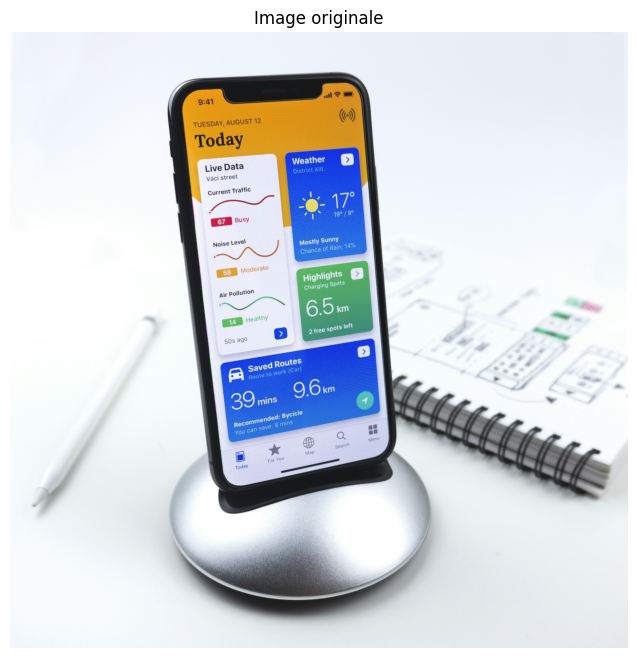

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
ImagesAChiffrer/image_depart.jpg: JPEG image data, JFIF standard 1.02, resolution (DPI), density 72x72, segment length 16, progressive, precision 8, 3643x3632, components 3


In [9]:
import os
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

# Télécharger une image test si elle n'existe pas déjà
image_path = "ImagesAChiffrer/image_depart.jpg"

# Afficher l'image
img = Image.open(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.title("Image originale")
plt.axis('off')
plt.show()

# Vérifier le format de l'image
!file {image_path}

### Conversion de l'image au format JPEG (si nécessaire)

In [10]:
# Fonction pour vérifier si une image est au format JPEG
def is_jpeg(file_path):
    import subprocess
    result = subprocess.run(['file', file_path], capture_output=True, text=True)
    return 'JPEG' in result.stdout

# Conversion si nécessaire
if not is_jpeg(image_path):
    converted_path = "ImagesConversion/image_convertie.jpg"
    !convert {image_path} {converted_path}
    print(f"Image convertie en JPEG: {converted_path}")
    image_path = converted_path
else:
    print("L'image est déjà au format JPEG, aucune conversion nécessaire")

L'image est déjà au format JPEG, aucune conversion nécessaire


### Création d'un message à cacher

In [11]:
# Message à cacher
message = "Ceci est un message secret caché par stéganographie."

# Créer un fichier contenant le message
message_file = "MessageSecret/message_secret.txt"
with open(message_file, 'w') as f:
    f.write(message)

print(f"Message créé et enregistré dans le fichier: {message_file}")
print(f"Contenu du message: '{message}'")
print(f"Taille du message: {len(message)} caractères")

Message créé et enregistré dans le fichier: MessageSecret/message_secret.txt
Contenu du message: 'Ceci est un message secret caché par stéganographie.'
Taille du message: 52 caractères


## 3️⃣ Stéganographie - Cacher le message dans l'image

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Reading ImagesAChiffrer/image_depart.jpg....
JPEG compression quality set to 75
Extracting usable bits:   830476 bits
Correctable message size: 5952 bits, 0.72%
Encoded 'MessageSecret/message_secret.txt': 432 bits, 54 bytes
Finding best embedding...
    0:   231(49.8%)[53.5%], bias   196(0.85), saved:    -1, total:  0.03%
    2:   227(48.9%)[52.5%], bias   196(0.86), saved:    -1, total:  0.03%
    3:   212(45.7%)[49.1%], bias   155(0.73), saved:     0, total:  0.03%
   25:   217(46.8%)[50.2%], bias   140(0.65), saved:     0, total:  0.03%
   50:   216(46.6%)[50.0%], bias   136(0.63), saved:     0, total:  0.03%
  232:   210(45.3%)[48.6%], bias   138(0.66), saved:     0, total:  0.03%
232, 348: Embedding data: 432 in 830476
Bits embedded: 464, changed: 210(45.3%)[48.6%], bias: 138, tot: 826524, skip: 826060
Foiling statistics: corrections: 112, failed: 0, offset: 138.360656 +- 311.389522
Total bits changed: 348 (

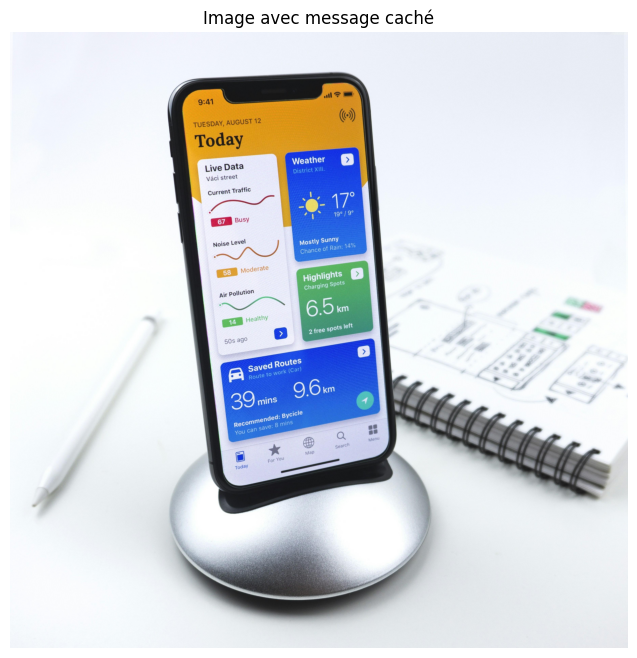

In [13]:
# Définir une clé secrète pour le chiffrement
cle_secrete = "clesupersecrete"

# Définir le chemin de l'image stéganographiée
image_stegano = "ImagesStegano/image_stegano.jpg"

# Cacher le message dans l'image
!outguess -k "{cle_secrete}" -d {message_file} {image_path} {image_stegano}

# Vérifier que l'image stéganographiée a été créée
if os.path.exists(image_stegano):
    print(f"Message caché avec succès dans l'image: {image_stegano}")
    
    img_stegano = Image.open(image_stegano)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_stegano)
    plt.title("Image avec message caché")
    plt.axis('off')
    plt.show()
else:
    print("Erreur: L'image stéganographiée n'a pas été créée.")

## 4️⃣ Extraction du message caché

In [17]:
# Définir le chemin du fichier d'extraction
message_extrait = "MessageSecret/message_extrait.txt"

# Extraire le message caché
!outguess -k "{cle_secrete}" -r {image_stegano} {message_extrait}

# Vérifier que le message a été extrait
if os.path.exists(message_extrait):
    with open(message_extrait, 'r') as f:
        message_recupere = f.read()
    
    print("=== Message extrait avec succès ===\n")
    print(f"Message original: '{message}'")
    print(f"Message extrait : '{message_recupere}'")
    
    if message == message_recupere:
        print("\n✅ Les messages correspondent parfaitement!")
    else:
        print("\n❌ Les messages ne correspondent pas.")
else:
    print("Erreur: Le message n'a pas pu être extrait.")

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Reading ImagesStegano/image_stegano.jpg....
Extracting usable bits:   830476 bits
Steg retrieve: seed: 232, len: 54
=== Message extrait avec succès ===

Message original: 'Ceci est un message secret caché par stéganographie.'
Message extrait : 'Ceci est un message secret caché par stéganographie.'

✅ Les messages correspondent parfaitement!
